In [67]:
# Import our dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

<Axes: xlabel='Feature 1', ylabel='Feature 2'>

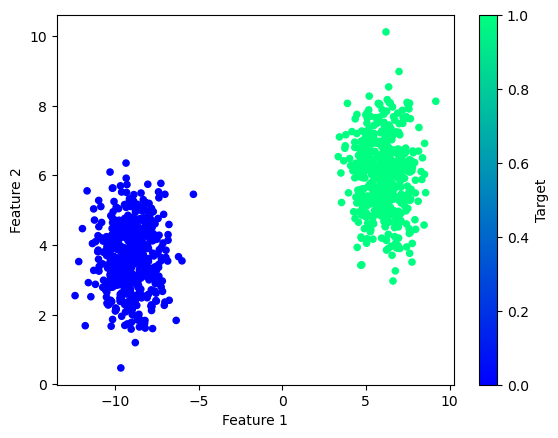

In [68]:
# Import the sample data
df = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m18/lesson_1/datasets/sample-data-1000.csv")

# Plot the sample data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [69]:
# Separate the X and y
X = df.drop(columns="Target")
y = df["Target"]

# Use sklearn to split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [70]:
# Create scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [71]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [72]:
# Set input nodes to the number of features
input_nodes = len(X.columns)

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=input_nodes))

/opt/anaconda3/envs/bootcamp/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [74]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

In [75]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.0771 - loss: 0.9988
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.1011 - loss: 0.9187
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.1279 - loss: 0.8774
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.1289 - loss: 0.8432
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.2139 - loss: 0.7953
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.2562 - loss: 0.7658
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - accuracy: 0.3741 - loss: 0.7254
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.5267 - loss: 0.6944
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.8116 - loss: 0.6550
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.9644 - loss: 0.6168
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - accuracy: 0.9956 - loss: 0.5818
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step

<Axes: >

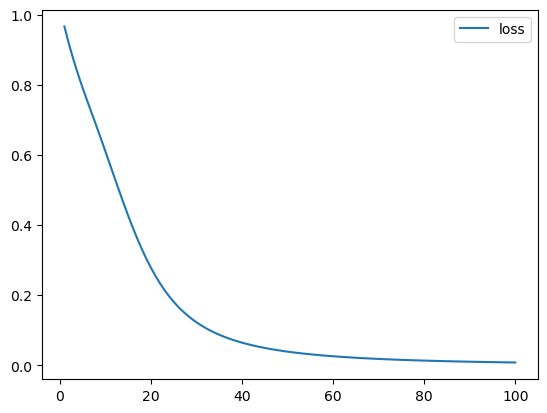

In [76]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

<Axes: >

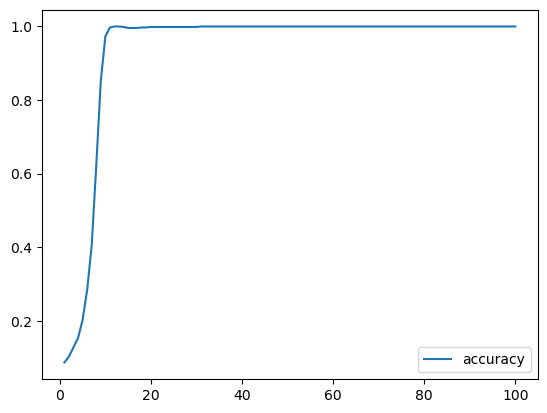

In [77]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [78]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - 6ms/step - accuracy: 1.0000 - loss: 0.0064
Loss: 0.006362283602356911, Accuracy: 1.0
